<a href="https://colab.research.google.com/github/muhammadhafiz27/Deep-Learning/blob/main/Pengenalan_Deep_Learning_dan_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# **Load dataset**

In [2]:
iris = load_iris()
X, y = iris.data, iris.target
X = StandardScaler().fit_transform(X)

## **Split data**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Convert ke tensor**

In [4]:
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

# **Definisikan MLP**

In [5]:
class MLP(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(MLP, self).__init__()
    self.model = nn.Sequential(
      nn.Linear(input_dim, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, output_dim)
    )
  def forward(self, x):
    return self.model(x)


# **Inisialisasi model**

In [6]:
model = MLP(4, 3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# **Training loop**

In [7]:
import time

loss_history = [] # Initialize a list to store loss values

start_time = time.time() # Record the start time

for epoch in range(100):
  optimizer.zero_grad()
  outputs = model(X_train)
  loss = criterion(outputs, y_train)
  loss.backward()
  optimizer.step()

  loss_history.append(loss.item()) # Append the loss value to the list

  if (epoch+1) % 10 == 0:
    print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')

end_time = time.time() # Record the end time
training_time = end_time - start_time # Calculate the training time

print(f'\nTraining time: {training_time:.4f} seconds') # Print the training time

Epoch [10/100], Loss: 0.3288
Epoch [20/100], Loss: 0.0853
Epoch [30/100], Loss: 0.0481
Epoch [40/100], Loss: 0.0405
Epoch [50/100], Loss: 0.0365
Epoch [60/100], Loss: 0.0322
Epoch [70/100], Loss: 0.0273
Epoch [80/100], Loss: 0.0216
Epoch [90/100], Loss: 0.0156
Epoch [100/100], Loss: 0.0104

Training time: 0.2855 seconds


# **Evaluasi**

In [8]:
with torch.no_grad():
  y_pred = torch.argmax(model(X_test), dim=1)
  acc = accuracy_score(y_test, y_pred)
  print(f'\nAkurasi Model: {acc:.4f}')


Akurasi Model: 1.0000


# **Analisis Hasil**

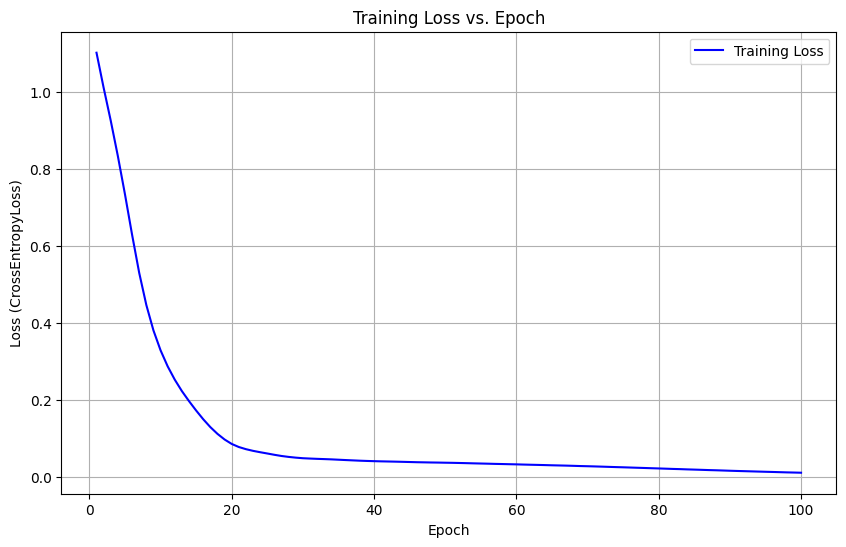

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Gunakan range(1, 101) untuk sumbu X (Epoch) dan loss_history untuk sumbu Y (Loss)
plt.plot(range(1, 101), loss_history, label='Training Loss', color='blue')
plt.title('Training Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss (CrossEntropyLoss)')
plt.grid(True)
plt.legend()
plt.show()